In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

In [3]:
d=30000 #19/5/2012 10 am-28/7/2018 11pm
data=pd.read_csv('/content/drive/MyDrive/mtech/project/lstm_sst_2/moored_buoy_data/bd10/combined_3.csv')
df=data.iloc[:d,:]
data_matrix=df.to_numpy()
data_sliced=data_matrix[:,3:]


In [4]:
l=24#lookback
n=1#number of days predicting
#slice of data; this data is from #19-5-2012 3am - 19/5/2018 3 am 

features_set = [] # Input Matrix
labels = []       # Output Array
for i in range(l, d-n+1):
    
    labels.append(data_sliced[i+n-1:i+n, 0])
'''for i in range(l, 30000):
    features_set.append(data_sliced[i][1:])
    labels.append(data_sliced[i][0])'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_scaled = scaler.fit_transform(data_sliced)

for i in range(l, d-n+1):
    features_set.append(data_scaled[i-l:i, 0:data_sliced.shape[1]])


features_set, labels = np.array(features_set), np.array(labels)
features_set,labels=np.asarray(features_set).astype(np.float32),np.asarray(labels).astype(np.float32)

#features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1],1))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 8)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 24, 5)        280         ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 24, 6)        288         ['lstm[0][0]']                   
                                                                                                  
 concatenate (Concatenate)      (None, 24, 14)       0           ['lstm_1[0][0]',                 
                                                                  'input_1[0][0]']            

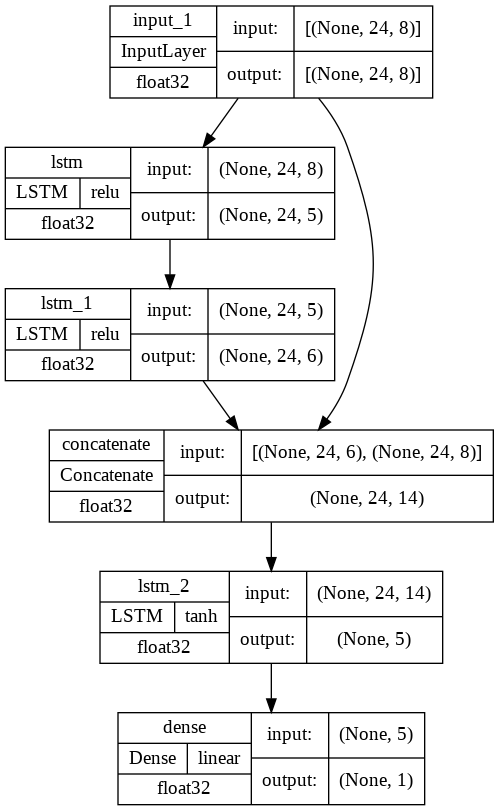

In [5]:
# Shared Feature Extraction Layer
import tensorflow as tf
# from tf.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import concatenate
visible=Input(shape=(l,len(data_scaled[0])))
extract1=LSTM(5,return_sequences=True,activation='relu')(visible)
extract2=LSTM(6,return_sequences=True,activation='relu')(extract1)
merge=concatenate([extract2,visible])
extract3=LSTM(5)(merge)
output=Dense(1)(extract3)
model=Model(inputs=visible,outputs=output)
print(model.summary())
plot_model(model, to_file='shared_feature_extractor.png',show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True)


In [6]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [7]:
model.fit(features_set, labels, epochs = 5, batch_size = 64)

Epoch 1/5
469/469 [==============================] - 47s 84ms/step - loss: 0.5737
Epoch 2/5
469/469 [==============================] - 38s 81ms/step - loss: 0.0980
Epoch 3/5
469/469 [==============================] - 38s 81ms/step - loss: 0.0712
Epoch 4/5
469/469 [==============================] - 39s 83ms/step - loss: 0.0612
Epoch 5/5
469/469 [==============================] - 41s 87ms/step - loss: 0.0553


In [8]:
model.save('/content/drive/MyDrive/mtech/project/lstm_sst_2/code/functional_api/timeandsst/model/mod15/11/2022/sst_l24_n1_epoch5_batch_64_v9.hdf5')